In [344]:
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt

In [345]:
data = pd.read_csv('C:/Users/Abhi/Downloads/HR_comma_sep.csv')
df = pd.DataFrame(data)
df.head()
df.count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

In [346]:
left = df[df.left==1]
y = df.left

In [347]:
retained = df[df.left==0]
retained.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [348]:
new_left_df = df.groupby('salary')['left'].count()
new_df

salary
high      1237
low       7316
medium    6446
Name: left, dtype: int64

Text(0, 0.5, 'Amount_of_people_left')

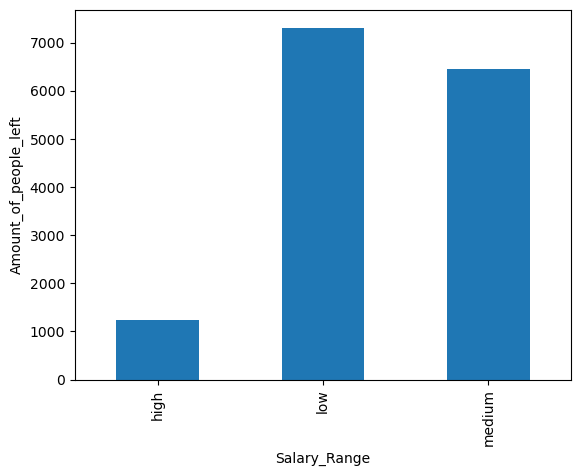

In [349]:
# plt.plot(new_retained_df)kind='bar'
# plt.show()
new_left_df.plot(kind='bar')
plt.xlabel("Salary_Range")
plt.ylabel("Amount_of_people_left")

<Axes: xlabel='Department'>

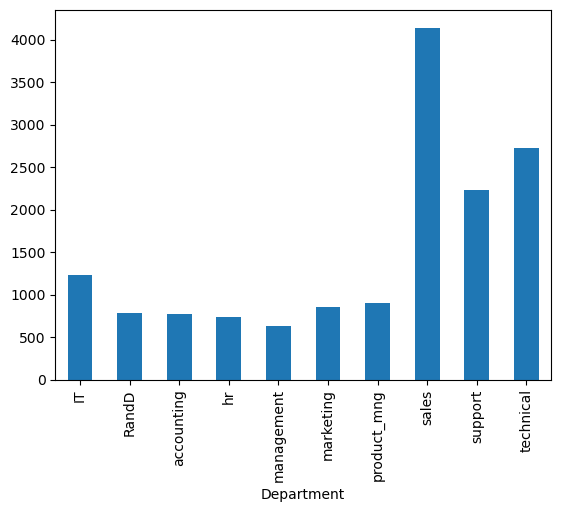

In [350]:
left_by_deparment = df.groupby('Department')['left'].count()
left_by_deparment.plot(kind='bar')

In [351]:
independent_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
independent_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [352]:
from sklearn.model_selection import train_test_split

In [353]:
salary_dummies = pd.get_dummies(independent_df.salary,prefix = "salary").astype(int)
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [354]:
independent_df = pd.concat([independent_df,salary_dummies],axis= 1)
independent_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [355]:
independent_df = independent_df.drop(['salary','salary_high'],axis = 1)

In [356]:
X_train,X_test,y_train,y_test = train_test_split(independent_df,df.left,train_size = 0.85)

X_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
1349,0.87,221,0,0,1
14194,0.67,241,0,0,1
7947,0.98,237,0,0,1
373,0.36,142,0,0,1
8721,0.62,212,0,0,1


In [357]:
from sklearn import linear_model
l_model = linear_model.LogisticRegression()
l_model.fit(X_train,y_train)

LogisticRegression()

In [358]:
l_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [359]:
predicting_values= [0.2,230,0,1,0]
l_model.predict([predicting_values])  # 0 = Not Quitting , 1 = Quitting

C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [360]:
l_model.score(X_test,y_test)

0.772

In [361]:
import pickle

In [362]:
with open('hr_model','wb') as file:
    pickle.dump(l_model,file)

In [363]:
with open('hr_model','rb') as f:
    lm = pickle.load(f)
    
lm.predict([[0.8,230,0,1,1]])


C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)